<a href="https://colab.research.google.com/github/knolasco/Vaccine-Sentiment-Analysis/blob/main/Twitter_Project_Gather_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import tweepy
import re # to remove numbers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

import datetime
from textblob import TextBlob
import numpy as np
import pandas as pd
from google.colab import files
upload = files.upload()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Saving My_Keys.csv to My_Keys.csv


In [ ]:
my_keys = pd.read_csv('My_Keys.csv')
consumer_key = my_keys['Key'][0]
consumer_secret = my_keys['Key'][1]
access_token_key = my_keys['Key'][2]
access_token_secret = my_keys['Key'][3]

In [ ]:
# establish a connection with API by authenticating myself
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token_key,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)


In [ ]:
# grab 1000 tweets for each day, save the date and clean the tweet
cleanedTweets = []
dates = []
for i in range(9):
  date_until = datetime.datetime(2020,12,15,0,0,0) + datetime.timedelta(days = i)
  for tweet in tweepy.Cursor(api.search, q = 'Vaccine', result_type = 'recent', include_entities = True, lang = 'en', until = date_until).items(1000):
    dates.append(tweet.created_at.date())
    tweet = tweet.text
    tweet = re.sub(r'(@[A-Za-z0-9]+)|#|RT[\s]+|https?:\/\/\S+|:', '', tweet) # remove handles, hashtag symbol, retweet mentions, links
    cleanedTweets.append(tweet)

In [ ]:
# add the cleaned tweets into a dataframe
data = list(zip(cleanedTweets, dates))
df = pd.DataFrame(data, columns = ['Tweets', 'Dates'])
df.head()

,Tweets,Dates
0,[Webinar] Mandatory or Optional? An Employers ...,2020-12-14
1,"Tonight at 700 PM EST, NEJM Editor-in-Chief E...",2020-12-14
2,"_sup @_saint_official Eng Trans,Trans by sis...",2020-12-14
3,"Today, I spoke to Dr. Lorish, Chief Executive...",2020-12-14
4,The Trump administration turned down more vacc...,2020-12-14


In [ ]:
df['Dates'].unique()

array([datetime.date(2020, 12, 14), datetime.date(2020, 12, 15),
       datetime.date(2020, 12, 16), datetime.date(2020, 12, 17),
       datetime.date(2020, 12, 18), datetime.date(2020, 12, 19),
       datetime.date(2020, 12, 20), datetime.date(2020, 12, 21),
       datetime.date(2020, 12, 22)], dtype=object)

In [ ]:
# remove the stop words and add them to the df
def remove_stopwords(text):
  tmp = stopwords.words('english')
  return ' '.join([word for word in text.lower().split() if word not in tmp])

# add to the dataframe
df['Tweet without StopWords'] = df['Tweets'].apply(remove_stopwords)
df

,Tweets,Dates,Tweet without StopWords
0,[Webinar] Mandatory or Optional? An Employers ...,2020-12-14,[webinar] mandatory optional? employers guide ...
1,"Tonight at 700 PM EST, NEJM Editor-in-Chief E...",2020-12-14,"tonight 700 pm est, nejm editor-in-chief eric ..."
2,"_sup @_saint_official Eng Trans,Trans by sis...",2020-12-14,"_sup @_saint_official eng trans,trans sisi mee..."
3,"Today, I spoke to Dr. Lorish, Chief Executive...",2020-12-14,"today, spoke dr. lorish, chief executive provi..."
4,The Trump administration turned down more vacc...,2020-12-14,trump administration turned vaccine doses 'as ...
...,...,...,...
8691,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...
8692,“I took this very personally. I wanted to fig...,2020-12-21,"“i took personally. wanted fight it, beat ... ..."
8693,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...
8694,"“I've done vaccine trials for 30 years, and I...",2020-12-21,"“i've done vaccine trials 30 years, promise co..."


In [ ]:
# add subjectivity and polarity
def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

# add to the dataframe
df['Subjectivity'] = df['Tweets'].apply(get_subjectivity)
df['Polarity'] = df['Tweets'].apply(get_polarity)

df

,Tweets,Dates,Tweet without StopWords,Subjectivity,Polarity
0,[Webinar] Mandatory or Optional? An Employers ...,2020-12-14,[webinar] mandatory optional? employers guide ...,0.000000,0.000000
1,"Tonight at 700 PM EST, NEJM Editor-in-Chief E...",2020-12-14,"tonight 700 pm est, nejm editor-in-chief eric ...",0.000000,0.000000
2,"_sup @_saint_official Eng Trans,Trans by sis...",2020-12-14,"_sup @_saint_official eng trans,trans sisi mee...",1.000000,0.500000
3,"Today, I spoke to Dr. Lorish, Chief Executive...",2020-12-14,"today, spoke dr. lorish, chief executive provi...",0.000000,0.000000
4,The Trump administration turned down more vacc...,2020-12-14,trump administration turned vaccine doses 'as ...,0.259722,0.086111
...,...,...,...,...,...
8691,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...,0.400000,0.000000
8692,“I took this very personally. I wanted to fig...,2020-12-21,"“i took personally. wanted fight it, beat ... ...",0.390000,0.000000
8693,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...,0.400000,0.000000
8694,"“I've done vaccine trials for 30 years, and I...",2020-12-21,"“i've done vaccine trials 30 years, promise co...",0.250000,-0.250000


In [ ]:
# label the polarity
def label_polarity(score):
  if score > 0:
    return 'Positive'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Negative'

# add to the df

df['Label'] = df['Polarity'].apply(label_polarity)
df

,Tweets,Dates,Tweet without StopWords,Subjectivity,Polarity,Label
0,[Webinar] Mandatory or Optional? An Employers ...,2020-12-14,[webinar] mandatory optional? employers guide ...,0.000000,0.000000,Neutral
1,"Tonight at 700 PM EST, NEJM Editor-in-Chief E...",2020-12-14,"tonight 700 pm est, nejm editor-in-chief eric ...",0.000000,0.000000,Neutral
2,"_sup @_saint_official Eng Trans,Trans by sis...",2020-12-14,"_sup @_saint_official eng trans,trans sisi mee...",1.000000,0.500000,Positive
3,"Today, I spoke to Dr. Lorish, Chief Executive...",2020-12-14,"today, spoke dr. lorish, chief executive provi...",0.000000,0.000000,Neutral
4,The Trump administration turned down more vacc...,2020-12-14,trump administration turned vaccine doses 'as ...,0.259722,0.086111,Positive
...,...,...,...,...,...,...
8691,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...,0.400000,0.000000,Neutral
8692,“I took this very personally. I wanted to fig...,2020-12-21,"“i took personally. wanted fight it, beat ... ...",0.390000,0.000000,Neutral
8693,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...,0.400000,0.000000,Neutral
8694,"“I've done vaccine trials for 30 years, and I...",2020-12-21,"“i've done vaccine trials 30 years, promise co...",0.250000,-0.250000,Negative


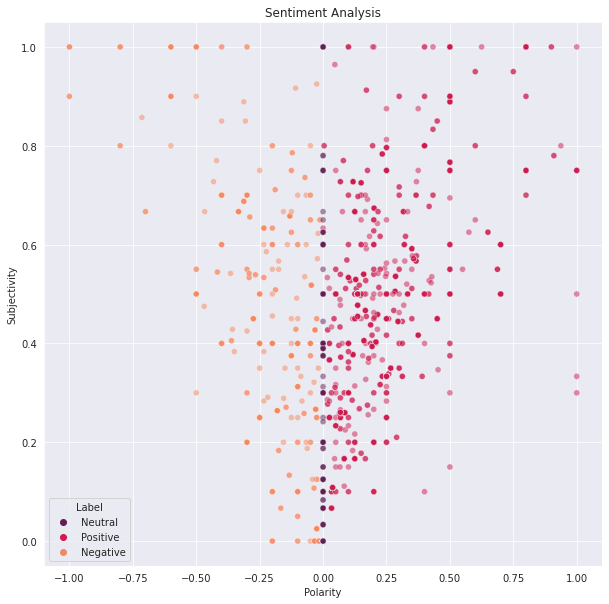

In [ ]:
# plot the subjectivity and polarity
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'Polarity',y = 'Subjectivity', hue = 'Label', data = df, palette = 'rocket', alpha = 0.5)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.grid()
plt.show()

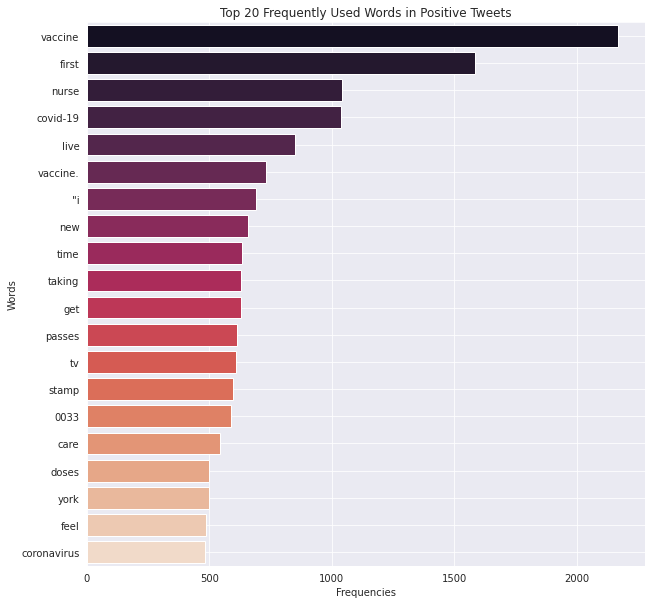

In [ ]:
# find the most frequently used words from the positive tweets
positiveTweets = df['Tweet without StopWords'][df['Label'] == 'Positive']
from collections import Counter
overallCount = {}

for tweet in positiveTweets:
  positiveCounts = Counter(tweet.lower().split())
  for word in positiveCounts:
    if word not in overallCount:
      overallCount[word] = 1
    else:
      overallCount[word] += 1
  
sortedCounts = sorted(overallCount.items(), key = lambda x: x[1], reverse = True)

# save the top 20 words and their frequencies
text = []
frequencies = []
for i in range(20):
  txt, freq = sortedCounts[i][0], sortedCounts[i][1]
  text.append(txt)
  frequencies.append(freq)

# plot using bar
plt.figure(figsize = (10,10))
sns.barplot(y = text, x = frequencies, palette = 'rocket')
plt.title('Top 20 Frequently Used Words in Positive Tweets')
plt.xlabel('Frequencies')
plt.ylabel('Words')
plt.grid()
plt.show()

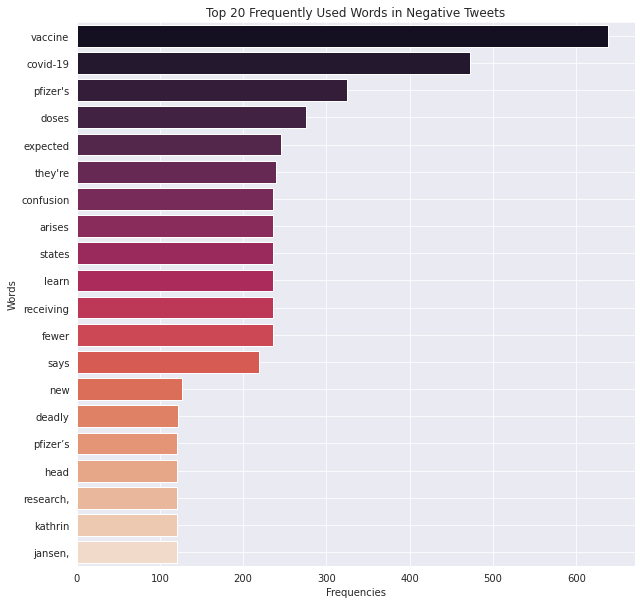

In [ ]:
# find the most frequently used words from the negative tweets
negativeTweets = df['Tweet without StopWords'][df['Label'] == 'Negative']
from collections import Counter
overallCount = {}

for tweet in negativeTweets:
  negativeCounts = Counter(tweet.lower().split())
  for word in negativeCounts:
    if word not in overallCount:
      overallCount[word] = 1
    else:
      overallCount[word] += 1
  
sortedCounts = sorted(overallCount.items(), key = lambda x: x[1], reverse = True)

# save the top 20 words and their frequencies
text = []
frequencies = []
for i in range(20):
  txt, freq = sortedCounts[i][0], sortedCounts[i][1]
  text.append(txt)
  frequencies.append(freq)

# plot using bar
plt.figure(figsize = (10,10))
sns.barplot(y = text, x = frequencies, color = 'red', palette = 'rocket')
plt.title('Top 20 Frequently Used Words in Negative Tweets')
plt.xlabel('Frequencies')
plt.ylabel('Words')
plt.grid()
plt.show()

<Figure size 720x720 with 0 Axes>

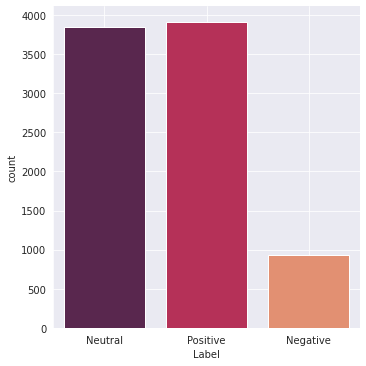

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(x = 'Label', kind = 'count', data = df, palette = 'rocket')
plt.grid()
plt.show()

In [ ]:
def remove_commas(text):
  return text.replace(',','')
df['Tweets'] = df['Tweets'].apply(remove_commas)
df['Tweet without StopWords'] = df['Tweet without StopWords'].apply(remove_commas)
df

,Tweets,Dates,Tweet without StopWords,Subjectivity,Polarity,Label
0,[Webinar] Mandatory or Optional? An Employers ...,2020-12-14,[webinar] mandatory optional? employers guide ...,0.000000,0.000000,Neutral
1,Tonight at 700 PM EST NEJM Editor-in-Chief Er...,2020-12-14,tonight 700 pm est nejm editor-in-chief eric r...,0.000000,0.000000,Neutral
2,_sup @_saint_official Eng TransTrans by sisi...,2020-12-14,_sup @_saint_official eng transtrans sisi meet...,1.000000,0.500000,Positive
3,Today I spoke to Dr. Lorish Chief Executive f...,2020-12-14,today spoke dr. lorish chief executive provide...,0.000000,0.000000,Neutral
4,The Trump administration turned down more vacc...,2020-12-14,trump administration turned vaccine doses 'as ...,0.259722,0.086111,Positive
...,...,...,...,...,...,...
8691,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...,0.400000,0.000000,Neutral
8692,“I took this very personally. I wanted to fig...,2020-12-21,“i took personally. wanted fight it beat ... n...,0.390000,0.000000,Neutral
8693,“The vaccine isn't probably going to make a d...,2020-12-21,“the vaccine probably going make difference cu...,0.400000,0.000000,Neutral
8694,“I've done vaccine trials for 30 years and I ...,2020-12-21,“i've done vaccine trials 30 years promise cor...,0.250000,-0.250000,Negative


In [ ]:
df.to_csv('Twitter_Vaccine.csv')

In [ ]:
files.download('Twitter_Vaccine.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>